Heart Disease Prediction Proposal

Heart disease refers to different types of heart conditions, often stemming from factors like elevated blood pressure, blood sugar levels, and a range of lifestyle habits. It is a prominent topic of research in the field of life sciences, and it is very important for professionals to accurately diagnose their patients as soon as possible. Therefore, obtaining substantial and correct knowledge and information on the different variables related to heart disease through previously diagnosed patients is crucial for the future of healthcare. 

We will be predicting if the patient has heart disease based on the given data.

The dataset that will be used to answer the question is the Heart Disease Dataset found on kaggle.com. Consisting of four databases, Cleveland, Hungary, Switzerland, and Long Beach V, the dataset was collected in 1988. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. The dataset also includes the variables: 

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholesterol in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by fluoroscopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversible defect

In [38]:
library(rvest)
library(tidyverse)
library(tidymodels)
library(repr)

In [13]:
url <- "raw.githubusercontent.com/marlotea/dsci_group_project/main/data/heart.csv"

download.file(url, destfile = "heart.csv")
heart_data <- read_csv("heart.csv")

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
head(heart_data)

# data is already tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [47]:
# refactoring & creating test and training set

heart_data <- heart_data |>
    select(age, trestbps, chol, thalach, oldpeak, target) |>
    mutate(target = as_factor(target)) |>
    mutate(target = fct_recode(target, "Has Heart Disease" = "1", 
                               "No Heart Disease" = "0"))

heart_split <- initial_split(heart_data, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `target = fct_recode(target, `Has Heart Disease` = "1", `No
  Heart Disease` = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”


In [48]:
# preliminary exploratory data analysis

glimpse(heart_train)

heart_train |>
    distinct(target)

num_obs <- nrow(heart_train)
heart_train |>
    group_by(target) |>
    summarize(count = n(),
              percentage = n() / num_obs * 100)


Rows: 768
Columns: 6
$ age      <dbl> 58, 71, 34, 34, 51, 50, 67, 45, 63, 42, 44, 50, 51, 59, 64, 6…
$ trestbps <dbl> 100, 112, 118, 118, 140, 120, 106, 104, 135, 120, 130, 129, 1…
$ chol     <dbl> 248, 149, 210, 210, 308, 244, 223, 208, 252, 209, 233, 196, 2…
$ thalach  <dbl> 122, 125, 192, 192, 142, 162, 142, 148, 172, 173, 179, 163, 1…
$ oldpeak  <dbl> 1.0, 1.6, 0.7, 0.7, 1.5, 1.1, 0.3, 3.0, 0.0, 0.0, 0.4, 0.0, 1…
$ target   <fct> Has Heart Disease, Has Heart Disease, Has Heart Disease, Has …


target
<fct>
Has Heart Disease
No Heart Disease


target,count,percentage
<fct>,<int>,<dbl>
No Heart Disease,374,48.69792
Has Heart Disease,394,51.30208


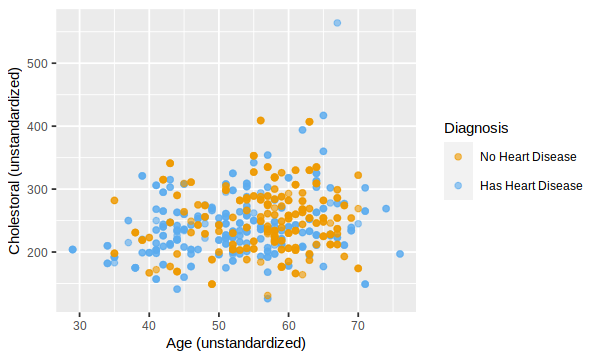

In [49]:
options(repr.plot.width=5, repr.plot.height=3)

# standardize the data before plotting

heart_exploratory <- heart_train |>
    ggplot(aes(x = age, y = chol, color = target)) +
    geom_point(alpha = 0.6) +
    labs(x = "Age (unstandardized)", 
         y = "Cholestoral (unstandardized)",
         color = "Diagnosis") +
    scale_color_manual(values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 9))

# plot 9 other graphs 

heart_exploratory